In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Q.1
* We have use the following dataset in the course material to generate two datasets form the same distribution but which have different sample means
  * here I am generating only 5 samples, insteaf of the 40 generated in the course material

In [ ]:
set.seed(110)
data_1 = tibble(measure=rnorm(5, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(5, 10, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)
complete_data

measure,site_name
<dbl>,<chr>
10.291195,Site 1
11.388863,Site 1
10.649010,Site 1
11.477876,Site 1
10.438720,Site 1
10.522318,Site 2
9.955392,Site 2
11.484413,Site 2
8.408989,Site 2


In [ ]:
* I compute the mean of the dataset above using the following code:
  * feel free to deconstruct the code to see what each chunk does.


In [ ]:
mean(complete_data[complete_data$site_name == "Site 1", ]$measure)
mean(complete_data[complete_data$site_name == "Site 2", ]$measure)

[1] 10.84913

[1] 10.11935

* Use the `tapply` function instead of the code above to compute the means samples from "Site 1" and those from site 2
  * See tapply for help if needed

In [ ]:
# Write your code here

tapply(complete_data$measure, complete_data$site_name, mean)

Site 1   Site 2 
10.84913 10.11935

Q.2 
Recall that the test conducted on full version of data_1 and data_2 led us to conlclude that the difference between the two datasets is statistically significant, when both samples were in fact from the same distirbution  $\mathcal{N}(\mu=10, \sigma=1)$

* Use the permutation-based test covered in class to assess whether you arrive at the same conclusion

* You can generate the data using the code snippet below



In [ ]:
set.seed(110)
data_1 = tibble(measure=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(40, 13, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)


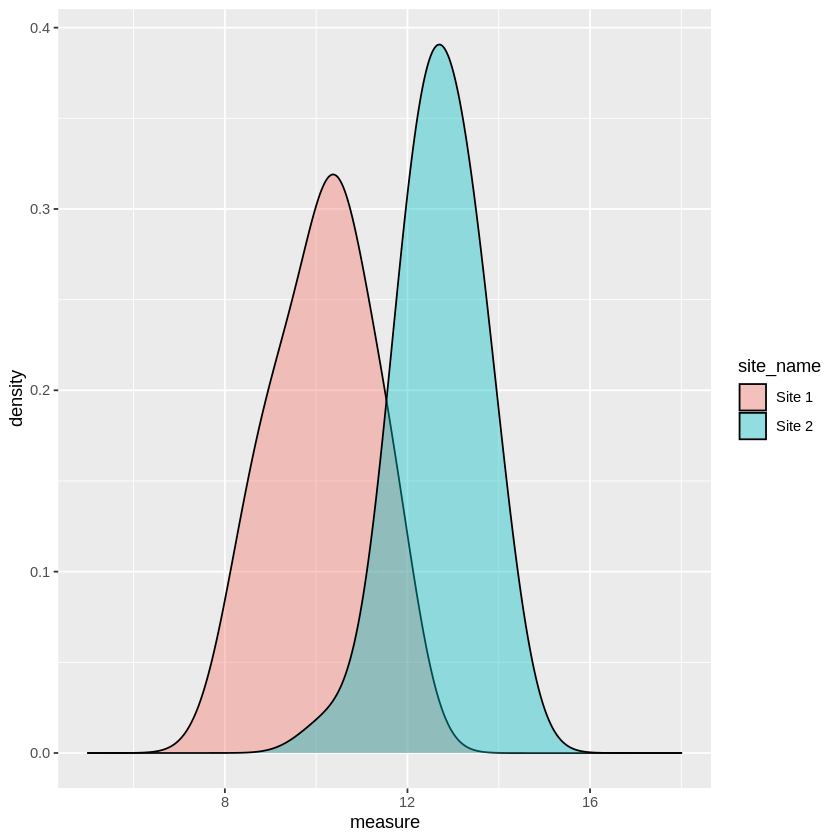

In [ ]:
ggplot(complete_data, aes(x=measure, fill = site_name)) + 
  geom_density(alpha = 0.4, bw =0.60) + 
  xlim(5,18)


In [ ]:
shuffled_data = sample(complete_data)

In [ ]:
processOneIter = function(data_1, data_2){
    
    concat_data = c(data_1, data_2)
    len_concat_data = length(concat_data)
    
    len_data_1 = length(data_1)    
    shuffled_data = sample(concat_data)
    new_data_1 = shuffled_data[1:len_data_1]
    new_data_2 = shuffled_data[(len_data_1+1):len_concat_data]
    mean(new_data_1) - mean(new_data_2)
    
}
processOneIter(data_1$measure, data_2$measure)

[1] -0.3806805

In [ ]:
replicate(5, processOneIter(data_1$measure, data_2$measure))

[1]  0.11527511  0.54807058  0.27159579  0.80727577 -0.02470954

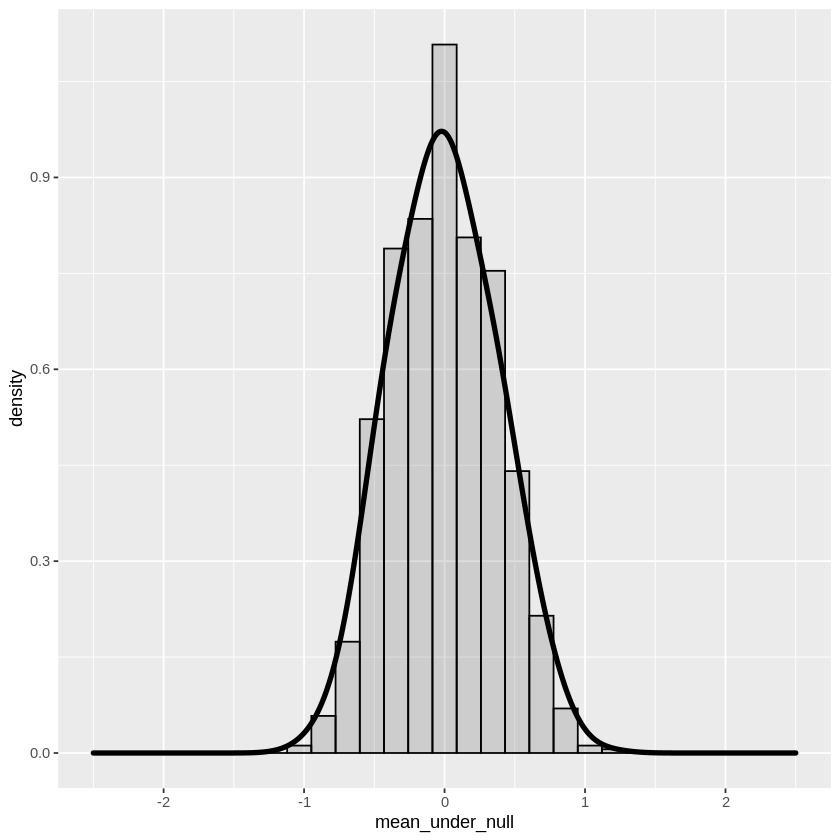

In [ ]:
mean_under_null = replicate(1000, processOneIter(data_1$measure, data_2$measure))

ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.15, size=1.5) + 
  xlim(-2.5, 2.5)

In [ ]:
observed_value = mean(data_1$measure) - mean(data_2$measure)
observed_value

[1] -2.553808

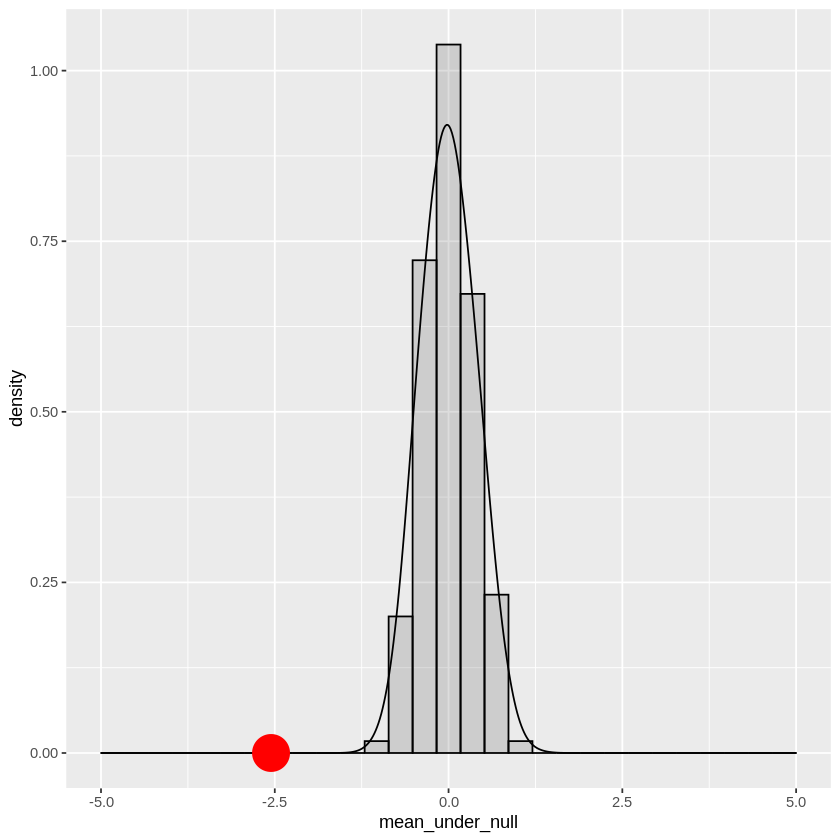

In [ ]:
ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.2, size=0.5) + 
  xlim(-5, 5) + 
  geom_point(aes(observed_value, 0), color="red", size=10)

In [ ]:
sum(mean_under_null <= observed_value)/ length(mean_under_null)

[1] 0

Q.3 

* The proportion of the of _P. lobata_, _M. capitata_ and _P. mendrina_ at a site X are c(0.60, 0.19, 0.21).
* You surveyed a site Y with somewhat differentenvironmental conditions and obtains the following proportions for the same coral (0.61, 0.19, 0.20). Use the multinomial non-parameteric hypotheses test to assess the proportions obtained at sites X and Y are statistically differnet



In [13]:
kind = c('P.lobata', 'P.lobata', 'M.capitata', 'M.capitata', 'P.meandrina', 'P.meandrina')
ratios = c(0.60, 0.61, 0.19, 0.19, 0.21, 0.20)
method = rep(c("known", "observed"), 3)

coral_porportions = tibble(kind, ratios, method) 
coral_porportions

kind,ratios,method
<chr>,<dbl>,<chr>
P.lobata,0.60,known
P.lobata,0.61,observed
M.capitata,0.19,known
M.capitata,0.19,observed
P.meandrina,0.21,known
P.meandrina,0.20,observed


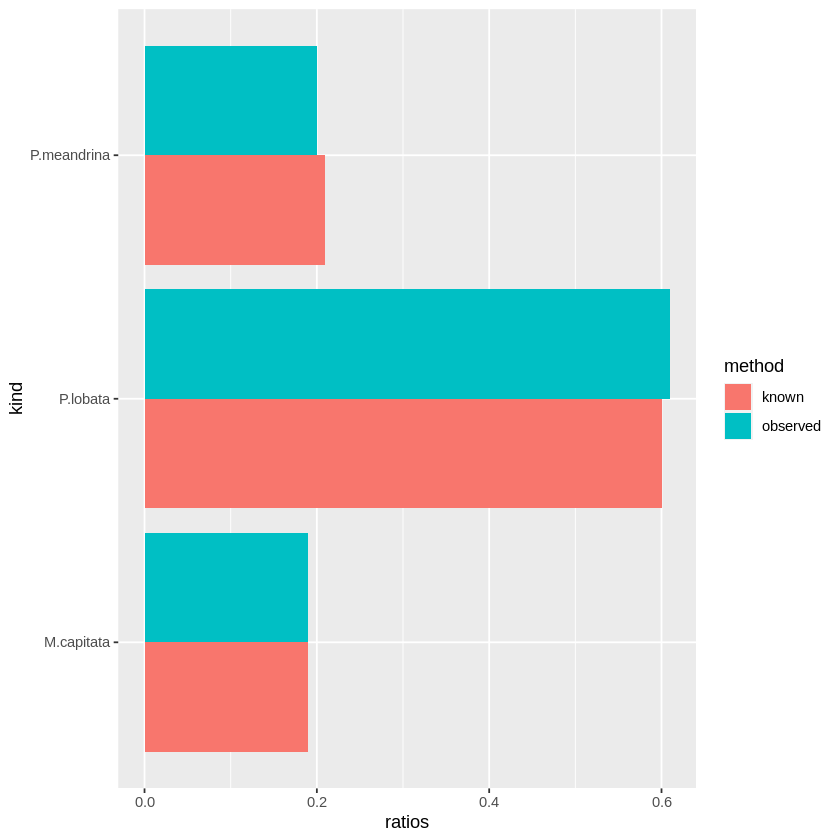

In [16]:
ggplot(coral_porportions, aes(fill=method, y=ratios, x=kind)) + 
    geom_bar(position = "dodge", stat = "identity") +
    coord_flip()


In [17]:
subtract_abs = function(x){
    abs(x[1] - x[2])
}

subtract_abs(c(20, 15))

[1] 5

In [18]:
tapply(coral_porportions$ratios, coral_porportions$kind, subtract_abs)

M.capitata    P.lobata P.meandrina 
       0.00        0.01        0.01

In [19]:
sum(tapply(coral_porportions$ratios, coral_porportions$kind, subtract_abs))/2

[1] 0.01

In [21]:
sample(c('P.lobata', 'M.capitata', 'P.meandrina'), 100, replace=TRUE, prob=c(0.60, 0.19, 0.21))

[1] "P.lobata"    "P.lobata"    "M.capitata"  "M.capitata"  "P.lobata"   
  [6] "P.lobata"    "P.lobata"    "P.lobata"    "P.lobata"    "P.lobata"   
 [11] "P.lobata"    "P.lobata"    "P.lobata"    "P.lobata"    "M.capitata" 
 [16] "P.meandrina" "P.lobata"    "P.lobata"    "P.meandrina" "P.lobata"   
 [21] "M.capitata"  "P.lobata"    "M.capitata"  "P.lobata"    "P.lobata"   
 [26] "P.lobata"    "P.lobata"    "M.capitata"  "P.lobata"    "P.lobata"   
 [31] "M.capitata"  "M.capitata"  "P.meandrina" "P.lobata"    "P.meandrina"
 [36] "P.lobata"    "M.capitata"  "P.lobata"    "P.lobata"    "P.meandrina"
 [41] "P.lobata"    "P.lobata"    "P.meandrina" "M.capitata"  "P.lobata"   
 [46] "P.lobata"    "P.meandrina" "P.lobata"    "P.lobata"    "P.lobata"   
 [51] "P.lobata"    "M.capitata"  "P.lobata"    "P.lobata"    "P.lobata"   
 [56] "P.lobata"    "P.lobata"    "P.lobata"    "P.meandrina" "M.capitata" 
 [61] "P.lobata"    "P.lobata"    "M.capitata"  "M.capitata"  "P.meandrina"
 [66] "P.meandrina" "P.lobata"    "P.lobata"    "M.capitata"  "P.lobata"   
 [71] "P.lobata"    "P.meandrina" "P.meandrina" "P.lobata"    "M.capitata" 
 [76] "M.capitata"  "P.lobata"    "P.lobata"    "P.meandrina" "P.lobata"   
 [81] "P.meandrina" "P.lobata"    "P.meandrina" "P.meandrina" "P.lobata"   
 [86] "P.lobata"    "M.capitata"  "P.lobata"    "P.lobata"    "P.lobata"   
 [91] "P.meandrina" "M.capitata"  "P.lobata"    "M.capitata"  "P.lobata"   
 [96] "P.lobata"    "P.lobata"    "M.capitata"  "P.lobata"    "P.lobata"

In [22]:
rmultinom(1, 100, prob=c(0.60, 0.19, 0.21))/100

0.59
0.26
0.15


In [23]:
sampleOneIteration = function(){
    true_proportions = c(0.60, 0.19, 0.21)
    sample_proportions = rmultinom(1, 200, prob=c(0.60, 0.19, 0.21))/200
    sample_tvd = sum(abs(true_proportions- sample_proportions))/2
    sample_tvd
        
}
sampleOneIteration()

[1] 0.03

In [24]:
tvds = replicate(1000, sampleOneIteration())

In [25]:
observed_stat = sum(tapply(coral_porportions$ratios, coral_porportions$kind, subtract_abs))/2

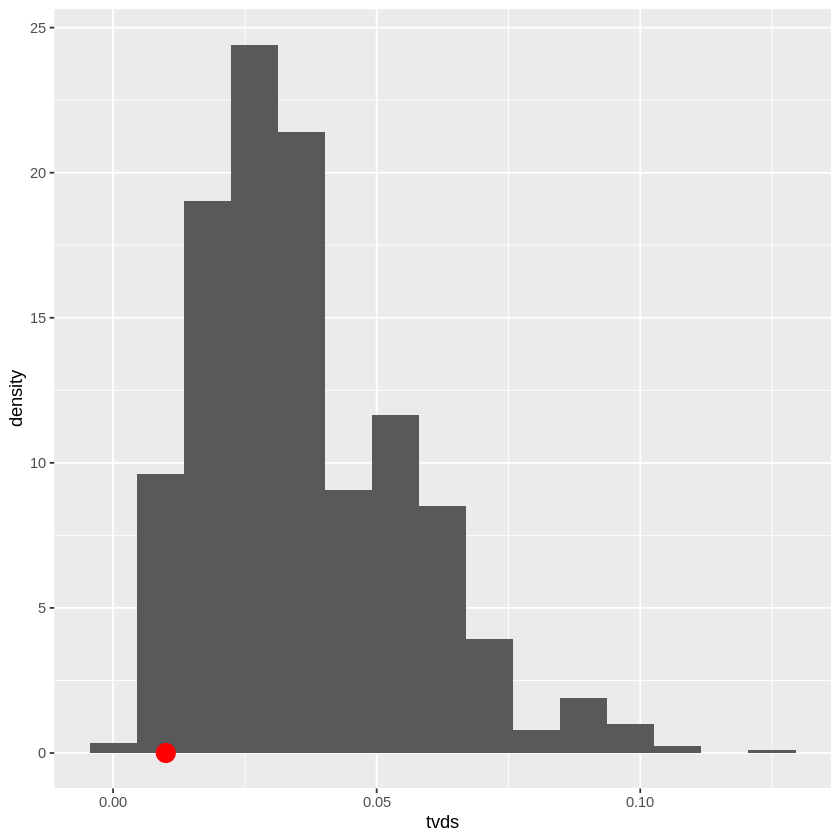

In [26]:
ggplot()+ 
  geom_histogram(aes(tvds, ..density..), bins = 15) +
  geom_point(aes(observed_stat, 0), size=5, color="red")

In [27]:
p_value = sum(tvds > observed_stat)  / length(tvds)
p_value

[1] 0.953